In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten


In [4]:

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [17]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [18]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Generators in Keras where we work on batches to process images
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'players/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(224,224),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'players/validation',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(224,224),
)

Found 208 files belonging to 26 classes.
Found 66 files belonging to 26 classes.


In [20]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,154 (80.66 MB)

 Trainable params: 21,144,154 (80.66 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
conv_base.trainable = False

In [23]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2025-07-22 16:36:15.540200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 574ms/step - accuracy: 0.0565 - loss: 11.0343 - val_accuracy: 0.0152 - val_loss: 14.8653
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.2467 - loss: 11.8280 - val_accuracy: 0.0909 - val_loss: 13.1267
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.3666 - loss: 6.5259 - val_accuracy: 0.0455 - val_loss: 10.1905
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 500ms/step - accuracy: 0.5863 - loss: 3.8504 - val_accuracy: 0.0152 - val_loss: 9.0760
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 496ms/step - accuracy: 0.6159 - loss: 3.1295 - val_accuracy: 0.0303 - val_loss: 7.0186
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 496ms/step - accuracy: 0.7922 - loss: 1.3731 - val_accuracy: 0.0758 - val_loss: 6.5420
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.8572 - loss: 0.4825 - val_accuracy: 0.0000e+00 - val_loss: 6.1522
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 457ms/step - accuracy: 0.9337 - loss: 0.2514 - val_accuracy: 0.0000e+00 - val_los

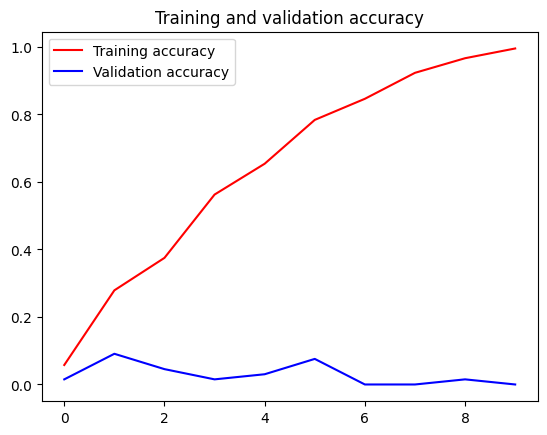

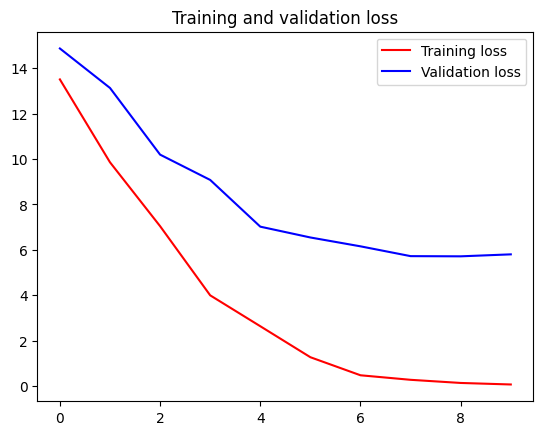

In [26]:
#Curves plottting for accuracy and val accuracy
import matplotlib.pyplot as plt
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_curves(history)

# Model with augmentation




In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [29]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'players/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
        'players/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


Found 208 images belonging to 26 classes.
Found 66 images belonging to 26 classes.


In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/Users/ankitpokhrel/Downloads/All projects/ML_Projects/CNN/cricketers_recognization/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.5012 - loss: 2.5965

/Users/ankitpokhrel/Downloads/All projects/ML_Projects/CNN/cricketers_recognization/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 512ms/step - accuracy: 0.4962 - loss: 2.6381 - val_accuracy: 0.0455 - val_loss: 7.7721
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step - accuracy: 0.5578 - loss: 2.0739 - val_accuracy: 0.0152 - val_loss: 6.7454
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 0.6133 - loss: 1.4303 - val_accuracy: 0.0152 - val_loss: 6.4959
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 464ms/step - accuracy: 0.7227 - loss: 1.1199 - val_accuracy: 0.0455 - val_loss: 6.2735
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.7903 - loss: 0.7658 - val_accuracy: 0.0152 - val_loss: 6.4823
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 466ms/step - accuracy: 0.8079 - loss: 0.7014 - val_accuracy: 0.0606 - val_loss: 6.1033
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.8900 - loss: 0.4104 - val_accuracy: 0.0455 - val_loss: 6.0244
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step - accuracy: 0.9157 - loss: 0.3395 - val_accuracy: 0.0152 - val_loss: 6.0645
Epo

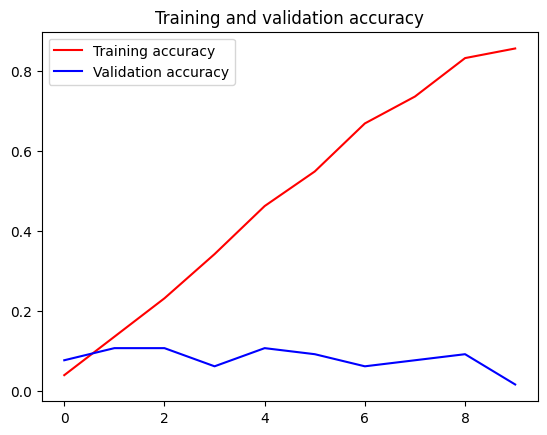

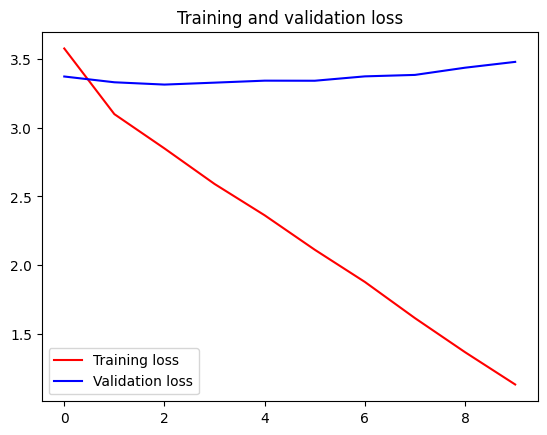

In [45]:
#Curves plottting for accuracy and val accuracy
import matplotlib.pyplot as plt
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_curves(history)

# Fine Tuning with Convolution Base

In [34]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [36]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [40]:
#Generators in Keras where we work on batches to process images
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'players/train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(224,224),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'players/validation',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(224,224),
)

Found 208 files belonging to 26 classes.


Found 66 files belonging to 26 classes.


In [41]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [43]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [47]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.8909 - loss: 0.9496 - val_accuracy: 0.0455 - val_loss: 3.5223
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 527ms/step - accuracy: 0.9748 - loss: 0.6619 - val_accuracy: 0.0455 - val_loss: 3.5423
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 0.9896 - loss: 0.5397 - val_accuracy: 0.0455 - val_loss: 3.5867
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 525ms/step - accuracy: 0.9964 - loss: 0.3873 - val_accuracy: 0.0455 - val_loss: 3.6373
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 525ms/step - accuracy: 0.9931 - loss: 0.2941 - val_accuracy: 0.0606 - val_loss: 3.7125
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 525ms/step - accuracy: 1.0000 - loss: 0.2053 - val_accuracy: 0.0455 - val_loss: 3.7456
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 525ms/step - accuracy: 1.0000 - loss: 0.1422 - val_accuracy: 0.0455 - val_loss: 3.8227
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 1.0000 - loss: 0.1073 - val_accuracy: 0.0909 - val_loss:

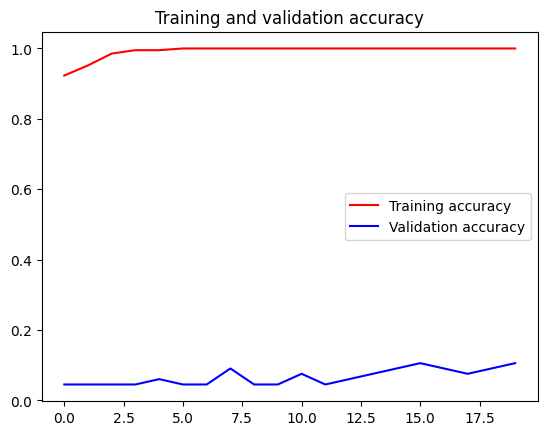

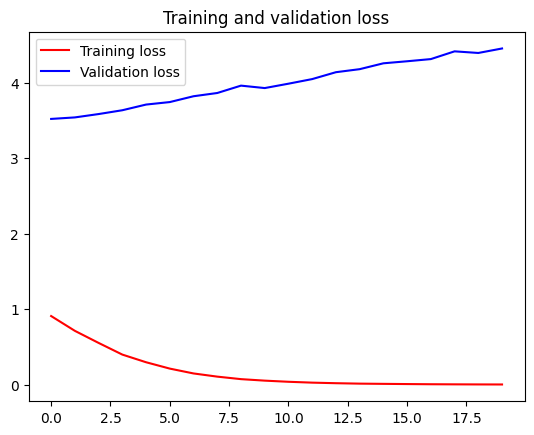

In [48]:
#Curves plottting for accuracy and val accuracy
import matplotlib.pyplot as plt
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_curves(history)

In [ ]:
#Let's test with some images by saving it in pickle file!
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#import pickle file and test with some data
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Finetuning with augmented data

In [49]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [50]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [51]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'players/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
        'players/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


Found 208 images belonging to 26 classes.
Found 66 images belonging to 26 classes.


In [52]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [53]:
history = model.fit(train_generator,epochs=20,validation_data=validation_generator)

/Users/ankitpokhrel/Downloads/All projects/ML_Projects/CNN/cricketers_recognization/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.0225 - loss: 5.9632 - val_accuracy: 0.0303 - val_loss: 4.1910
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - accuracy: 0.0576 - loss: 3.9835 - val_accuracy: 0.0455 - val_loss: 4.1172
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 0.1332 - loss: 3.6325 - val_accuracy: 0.0303 - val_loss: 4.0485
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.1347 - loss: 3.2633 - val_accuracy: 0.0303 - val_loss: 4.0358
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.1322 - loss: 3.0717 - val_accuracy: 0.0455 - val_loss: 4.0611
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.2866 - loss: 2.6368 - val_accuracy: 0.0455 - val_loss: 4.1068
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - accuracy: 0.3143 - loss: 2.5284 - val_accuracy: 0.0758 - val_loss: 4.1324
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 531ms/step - accuracy: 0.3120 - loss: 2.4772 - val_accuracy: 0.0303 - val_loss:

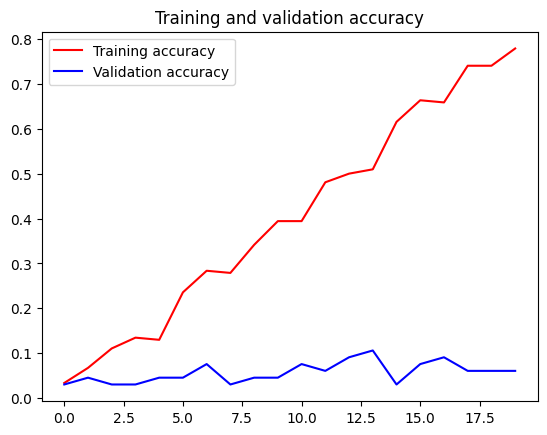

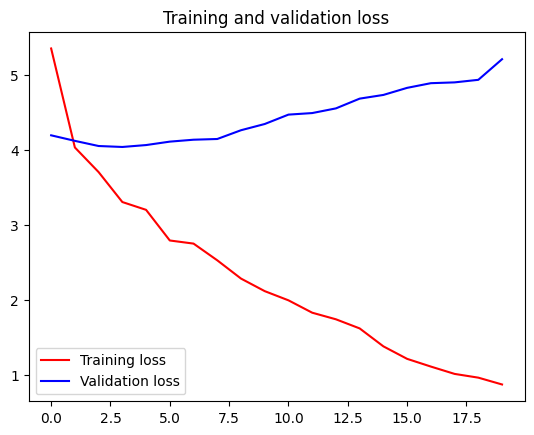

In [54]:
#Curves plottting for accuracy and val accuracy
import matplotlib.pyplot as plt
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_curves(history)

In [55]:
# Save the model
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [56]:
#Load model.pkl and start predicting
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [61]:
print(train_generator.class_indices)

{'aakash_chand': 0, 'aasif_sheikh': 1, 'ab_de_villiers': 2, 'anil_sah': 3, 'avinash_bohara': 4, 'basanta_regmi': 5, 'bhim_sharki': 6, 'bibek_yadav': 7, 'dev_khanal': 8, 'dipendra_airee': 9, 'gulsan_jha': 10, 'gyanendra_malla': 11, 'karan_kc': 12, 'kushal_bhurtel': 13, 'kushal_malla': 14, 'lalit_rajbanshi': 15, 'lokesh_bam': 16, 'nandan_yadav': 17, 'paras_khadka': 18, 'pratis_gc': 19, 'rijan_dhakal': 20, 'rohit_paudel': 21, 'sandeep_lamichhane': 22, 'sharad_vesawkar': 23, 'sompal_kami': 24, 'virat_kohli': 25}


Total classes: 26
Classes: ['Aakash Chand', 'Aasif Sheikh', 'Ab De Villiers', 'Anil Sah', 'Avinash Bohara', 'Basanta Regmi', 'Bhim Sharki', 'Bibek Yadav', 'Dev Khanal', 'Dipendra Airee'] ...
Testing model with random validation samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


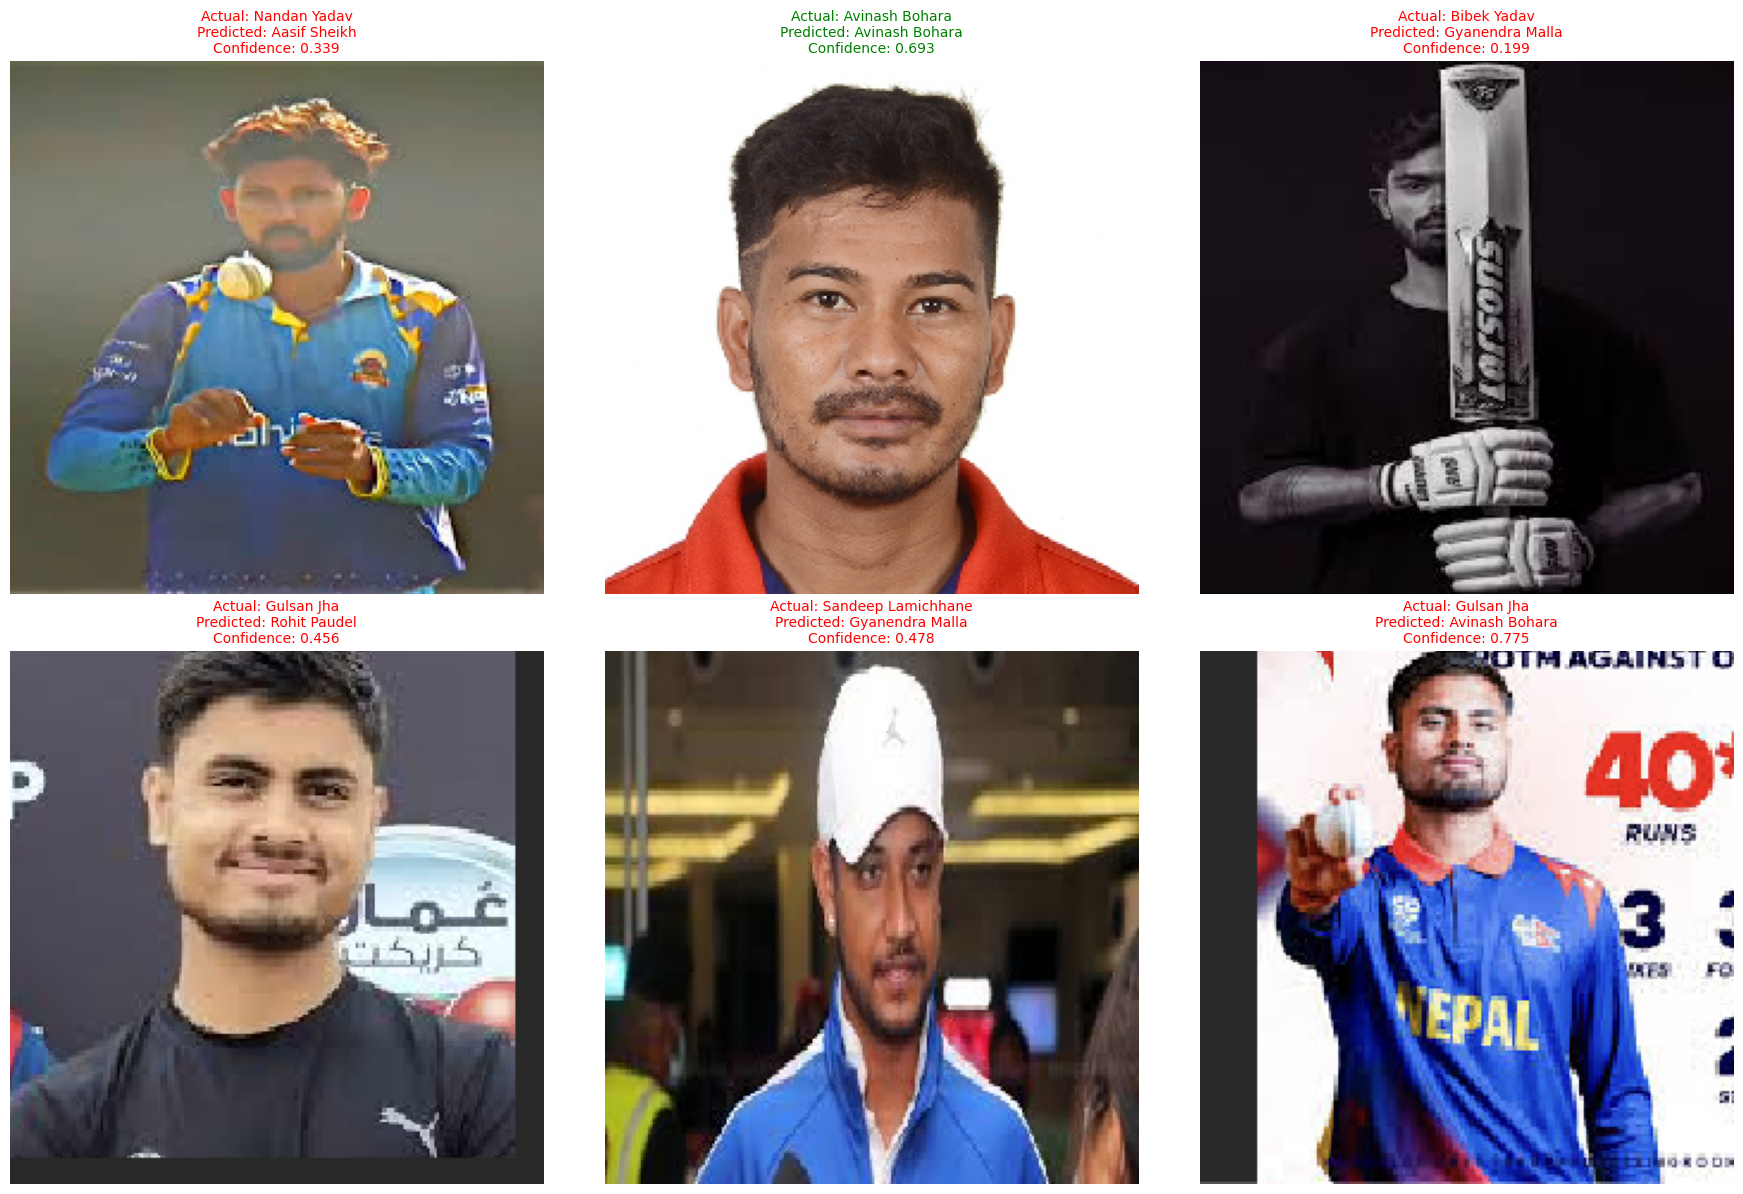


To test with a specific image, use:
predict_single_image('players/validation/rohit_paudel/image.jpg')

To test multiple images of a specific player, use:
test_player_images('Rohit Paudel', num_images=3)

Available players:
- Aakash Chand
- Aasif Sheikh
- Ab De Villiers
- Anil Sah
- Avinash Bohara
- Basanta Regmi
- Bhim Sharki
- Bibek Yadav
- Dev Khanal
- Dipendra Airee
- Gulsan Jha
- Gyanendra Malla
- Karan Kc
- Kushal Bhurtel
- Kushal Malla
- Lalit Rajbanshi
- Lokesh Bam
- Nandan Yadav
- Paras Khadka
- Pratis Gc
- Rijan Dhakal
- Rohit Paudel
- Sandeep Lamichhane
- Sharad Vesawkar
- Sompal Kami
- Virat Kohli


In [76]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Use the actual class indices from training
class_indices = {
    'aakash_chand': 0, 'aasif_sheikh': 1, 'ab_de_villiers': 2, 'anil_sah': 3, 
    'avinash_bohara': 4, 'basanta_regmi': 5, 'bhim_sharki': 6, 'bibek_yadav': 7, 
    'dev_khanal': 8, 'dipendra_airee': 9, 'gulsan_jha': 10, 'gyanendra_malla': 11, 
    'karan_kc': 12, 'kushal_bhurtel': 13, 'kushal_malla': 14, 'lalit_rajbanshi': 15, 
    'lokesh_bam': 16, 'nandan_yadav': 17, 'paras_khadka': 18, 'pratis_gc': 19, 
    'rijan_dhakal': 20, 'rohit_paudel': 21, 'sandeep_lamichhane': 22, 'sharad_vesawkar': 23, 
    'sompal_kami': 24, 'virat_kohli': 25
}

# Create reverse mapping (index to class name)
class_names = {v: k.replace('_', ' ').title() for k, v in class_indices.items()}

print(f"Total classes: {len(class_names)}")
print("Classes:", list(class_names.values())[:10], "...")

def predict_cricketer(img_path, model, class_names):
    """
    Predict the cricketer from an image
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_idx]
    
    # Get predicted class name
    predicted_class = class_names[predicted_class_idx]
    
    return predicted_class, confidence, img

# Test with some sample images from validation set
def test_random_samples(model, class_names, num_samples=6):
    """
    Test the model with random samples from validation set
    """
    validation_dir = 'players/validation'
    
    # Get all subdirectories (player names)
    player_dirs = [d for d in os.listdir(validation_dir) if os.path.isdir(os.path.join(validation_dir, d))]
    
    plt.figure(figsize=(18, 12))
    
    for i in range(min(num_samples, len(player_dirs))):
        # Select a random player directory
        player_dir = np.random.choice(player_dirs)
        player_path = os.path.join(validation_dir, player_dir)
        
        # Get all images in that directory
        images = [f for f in os.listdir(player_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if images:
            # Select a random image
            random_image = np.random.choice(images)
            img_path = os.path.join(player_path, random_image)
            
            # Make prediction
            predicted_name, confidence, img = predict_cricketer(img_path, model, class_names)
            
            # Format actual name for display
            actual_name = player_dir.replace('_', ' ').title()
            
            # Display results
            plt.subplot(2, 3, i+1)
            plt.imshow(img)
            
            # Color code the title based on prediction accuracy
            title_color = 'green' if predicted_name.lower() == actual_name.lower() else 'red'
            plt.title(f'Actual: {actual_name}\nPredicted: {predicted_name}\nConfidence: {confidence:.3f}', 
                     color=title_color, fontsize=10)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Test with random samples
print("Testing model with random validation samples...")
test_random_samples(model, class_names, num_samples=6)

# Function to predict from a specific image path
def predict_single_image(img_path):
    """
    Predict a single image and display result
    """
    if os.path.exists(img_path):
        predicted_name, confidence, img = predict_cricketer(img_path, model, class_names)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_name}\nConfidence: {confidence:.4f}', fontsize=14)
        plt.axis('off')
        plt.show()
        
        print(f"Predicted Player: {predicted_name}")
        print(f"Confidence: {confidence:.4f}")
        
        # Show top 5 predictions
        predictions = model.predict(np.expand_dims(image.img_to_array(img)/255.0, axis=0))
        top_5_indices = np.argsort(predictions[0])[-5:][::-1]
        
        print("\nTop 5 predictions:")
        for i, idx in enumerate(top_5_indices):
            print(f"{i+1}. {class_names[idx]}: {predictions[0][idx]:.4f}")
    else:
        print(f"Image not found: {img_path}")

# Function to test specific player images
def test_player_images(player_name, num_images=3):
    """
    Test multiple images of a specific player
    """
    validation_dir = f'players/validation/{player_name.lower().replace(" ", "_")}'
    
    if os.path.exists(validation_dir):
        images = [f for f in os.listdir(validation_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if images:
            test_images = np.random.choice(images, min(num_images, len(images)), replace=False)
            
            plt.figure(figsize=(15, 5))
            
            for i, img_name in enumerate(test_images):
                img_path = os.path.join(validation_dir, img_name)
                predicted_name, confidence, img = predict_cricketer(img_path, model, class_names)
                
                plt.subplot(1, len(test_images), i+1)
                plt.imshow(img)
                
                title_color = 'green' if predicted_name.lower() == player_name.lower() else 'red'
                plt.title(f'Predicted: {predicted_name}\nConfidence: {confidence:.3f}', 
                         color=title_color, fontsize=10)
                plt.axis('off')
            
            plt.suptitle(f'Testing images of {player_name.title()}', fontsize=14)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No images found for {player_name}")
    else:
        print(f"Directory not found for {player_name}")

# Example usage:
print("\nTo test with a specific image, use:")
print("predict_single_image('players/validation/rohit_paudel/image.jpg')")
print("\nTo test multiple images of a specific player, use:")
print("test_player_images('Rohit Paudel', num_images=3)")

print("\nAvailable players:")
for name in sorted(class_names.values()):
    print(f"- {name}")